Wir definieren die Fouriertransformation als Koeffizienten $\widehat {y_k}$ des Interpolationspolynoms $p$ an den $n$. Einheitswurzeln zu den Stützwerten $y_k$, $k=0\ldots n-1.$
$$\omega_k=e^{2\pi i k/n}, y_k=p(\omega_k)=\sum_{j=0}^{n-1}\widehat{y_j}\omega_k^j=\sum_{j=0}^{n-1} \widehat {y_j} e^{2\pi i kj/n}.$$
Laut Vorlesung ist dieses Interpolationsproblem besonders einfach lösbar. Wir berechnen die Vandermondematrix.

In [1]:
%%capture
%run Polynominterpolation.ipynb
import cmath
np.set_printoptions(precision=4)

Text(0, 0.5, 'Imaginärteil')

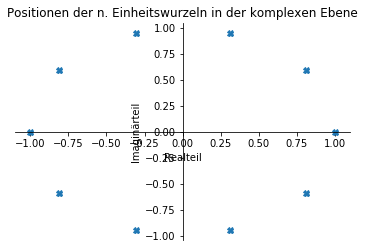

In [2]:
n=10
t=[cmath.exp(2*math.pi*1j*k/n) for k in range(0,n)]
t=np.array(t)
plt.plot(t.real,t.imag,'X');
ax=plt.gca()
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.title('Positionen der n. Einheitswurzeln in der komplexen Ebene')
ax.set_xlabel('Realteil')
ax.set_ylabel('Imaginärteil')

Wir definieren die Fouriertransformation (fast) wie in der Vorlesung und checken, dass Fouriertransformation und inverse Fouriertransformation inverse zueinander sind.

In [3]:
def fourtrans(y,sign=1):
    n=len(y)
    f=np.zeros(n,complex)
    omega=cmath.exp(1j*2*math.pi/n)
    for j in range(0,n):
        sum=0
        for k in range(0,n):
            sum=sum+omega**(sign*j*k)*y[k]
        if (sign==1):
            f[j]=sum
        else:
            f[j]=sum/n
    return f

def foureval(y,x,sign=1):
    n=len(y)
    omega=cmath.exp(1j)
    sum=0
    for k in range(0,n):
        # Prevent subsampling error. Not in the lecture.
        if (k>n/2):
            k=n-k
        sum=sum+omega**(sign*x*k)*y[k]
    return sum

n=8
y=np.random.rand(n)
F=fourtrans(y)
Y=fourtrans(F,-1)
print(np.linalg.norm(y-Y))
print(np.linalg.norm(fourtrans(y,-1)*n-np.fft.fft(y)))

1.3880996675262605e-15
4.435628970269217e-15


# Fourier-Interpolation einer linearen Funktion
Es sei $g:[-\pi,\pi]$. Die Fourier-Interpolation sucht ein Polynom $p\in {\cal P}_{n-1}$ mit
$$p(e^{i x_k})=g(x_k),\,x_k=2 \pi k/n-\pi, \,k=0\ldots n-1.$$ Wir beginnen mit $g(x)=x$.

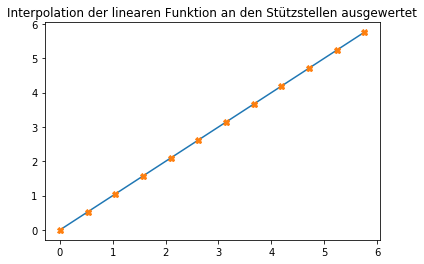

In [18]:
n=12
def g(x):
    return x
x=[k*2*math.pi/n for k in range(0,n)]
f=[g(w) for w in x]
y=fourtrans(f,-1)
N=n
X=[k*2*math.pi/N for k in range(0,N)]
Y=[foureval(y,w) for w in X]
plt.plot(X,np.array(Y).real,x,f,'X')
plt.title('Interpolation der linearen Funktion an den Stützstellen ausgewertet');

Wie erwartet, an den Stützstellen wird exakt interpoliert. Jetzt erhöhen wir die Auflösung.


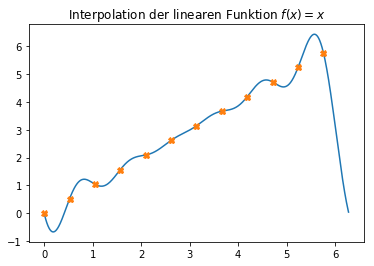

In [19]:
N=1024
X=[k*2*math.pi/N for k in range(0,N)]
Y=[foureval(y,w) for w in X]
plt.plot(X,np.array(Y).real,x,f,'X')
plt.title('Interpolation der linearen Funktion $f(x)=x$');

Hier für die Rechteck-Funktion.

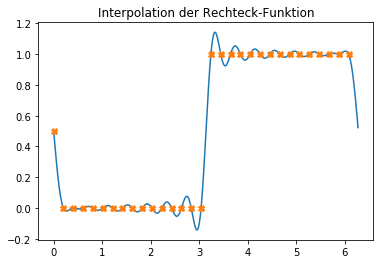

In [20]:
def g(x):
    if (x==0):
        return 0.5
    if (x>math.pi):
        return 1
    else:
        return 0

n=31
x=[k*2*math.pi/n for k in range(0,n)]
f=[g(w) for w in x]
y=fourtrans(f,-1)
N=1024
X=[k*2*math.pi/N for k in range(0,N)]
Y=[foureval(y,w) for w in X]
plt.plot(X,np.array(Y).real,x,f,'X')
plt.title('Interpolation der Rechteck-Funktion');


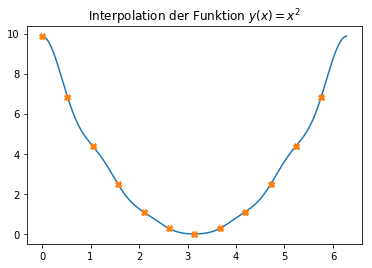

In [21]:
def g(x):
    return (x-math.pi)**2
    if (x>math.pi):
        return 
    else:
        return 0

n=12
x=[k*2*math.pi/n for k in range(0,n)]
f=[g(w) for w in x]
y=fourtrans(f,-1)
N=1024
X=[k*2*math.pi/N for k in range(0,N)]
Y=[foureval(y,w) for w in X]
plt.plot(X,np.array(Y).real,x,f,'X')
plt.title('Interpolation der Funktion $y(x)=x^2$');

# Was passiert, wenn wir einige Koeffizienten weglassen?

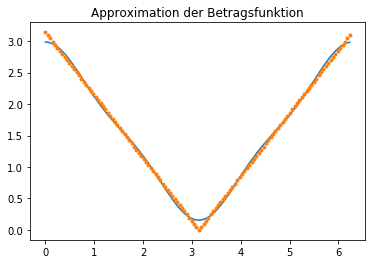

In [40]:
n=128
def g(x):
    return abs(x-math.pi)
x=[k*2*math.pi/n for k in range(0,n)]
f=[g(w) for w in x]
y=fourtrans(f,-1)
p=5
y[p:n-p]=0
N=n
X=[k*2*math.pi/N for k in range(0,N)]
Y=[foureval(y,w) for w in X]
plt.plot(X,np.array(Y).real,x,f,'.')
plt.title('Approximation der Betragsfunktion');

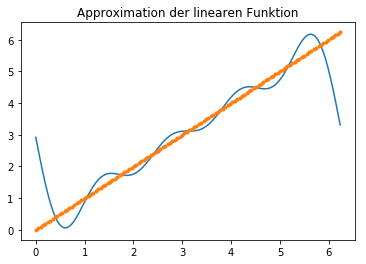

In [32]:
n=128
def g(x):
    return x
x=[k*2*math.pi/n for k in range(0,n)]
f=[g(w) for w in x]
y=fourtrans(f,-1)
p=5
y[p:n-p]=0
N=n
X=[k*2*math.pi/N for k in range(0,N)]
Y=[foureval(y,w) for w in X]
plt.plot(X,np.array(Y).real,x,f,'.')
plt.title('Approximation der linearen Funktion');

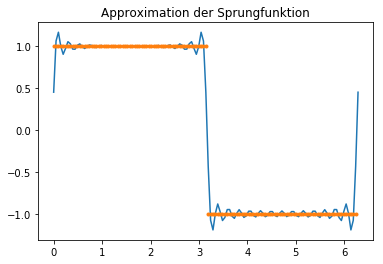

In [39]:
n=128
def g(x):
    if (x>math.pi):
        return -1;
    else:
        return 1
    
x=[k*2*math.pi/n for k in range(0,n)]
f=[g(w) for w in x]
y=fourtrans(f,-1)
p=29
y[p:n-p]=0
N=n
X=[k*2*math.pi/N for k in range(0,N+1)]
Y=[foureval(y,w) for w in X]
plt.plot(X,np.array(Y).real,x,f,'.')
plt.title('Approximation der Sprungfunktion');

Bei den "glatten" Teilen der Funktion passiert wenig, an den Sprungstellen gibt es Probleme.